In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
import matplotlib.pyplot as plt
import os

from src.utils.processing import creat_dataset, split_timestamp

base = "../data/Deployment_1/"

## 1. Load datasets

In [2]:
activities = pd.read_csv(base + "Activities.csv")
activities.head()

,TimeStamp,SensorID,Value,EnumerationID,ValueID,Name
0,2013-03-04 20:58:01,100,4,1,4,Working at PC
1,2013-03-04 22:35:51,100,3,1,3,Watching TV
2,2013-03-05 01:11:20,100,2,1,2,Sleeping
3,2013-03-05 11:47:05,100,8,1,8,Making Coffee
4,2013-03-05 11:50:57,100,1,1,1,Cooking


In [3]:
sensor_history = pd.read_csv(base + "Deployment_1_sensor_preprocessing_data.csv")
sensor_history.head()

,Date,Hour,Minute,Value,SensorID,TimeID
0,2013-03-04,18,42,160,1,2013-03-04-18-42
1,2013-03-04,18,42,160,1,2013-03-04-18-42
2,2013-03-04,18,42,160,1,2013-03-04-18-42
3,2013-03-04,18,42,160,1,2013-03-04-18-42
4,2013-03-04,18,43,160,1,2013-03-04-18-43


In [20]:
sensors = pd.read_csv(base + "Sensors.csv")
sensors

,SensorID,Name,Location,UnitName,\t
0,1,Temperature,Utility Room,Celsius,\t\t\t
1,2,Brightness (Daylight),Utility Room,Lux,\t\t\t
2,3,Motion,Utility Room,Activations,\t\t\t
3,4,Temperature,Kitchen,Celsius,\t\t\t
4,5,Brightness,Kitchen,Lux,\t\t\t
5,6,Motion,Kitchen,Activations,\t\t\t
6,7,Temperature,Work Area,Celsius,\t\t\t
7,8,Brigthness,Work Area,Lux,\t\t\t
8,9,Motion,Work Area,Activations,\t\t\t
9,10,Temperature,Living Room,Celsius,\t\t\t


## 2. Data exploration

In [21]:
activities["Name"].value_counts()

Working at PC      137
Ignore             107
Eating              86
Sleeping            44
Watching TV         35
Making Coffee       34
Cleaning Dishes     25
Cooking             22
Not at Home         19
Reading              4
Name: Name, dtype: int64

In [22]:
df_act = activities.copy()
df_act = split_timestamp(df_act)
df_act

,TimeStamp,SensorID,Value,EnumerationID,ValueID,Name,Date,Hour,Minute,TimeID
0,2013-03-04 20:58:01,100,4,1,4,Working at PC,2013-03-04,20,58,2013-03-04-20-58
1,2013-03-04 22:35:51,100,3,1,3,Watching TV,2013-03-04,22,35,2013-03-04-22-35
2,2013-03-05 01:11:20,100,2,1,2,Sleeping,2013-03-05,1,11,2013-03-05-01-11
3,2013-03-05 11:47:05,100,8,1,8,Making Coffee,2013-03-05,11,47,2013-03-05-11-47
4,2013-03-05 11:50:57,100,1,1,1,Cooking,2013-03-05,11,50,2013-03-05-11-50
...,...,...,...,...,...,...,...,...,...,...
508,2013-06-10 12:29:29,100,5,1,5,Eating,2013-06-10,12,29,2013-06-10-12-29
509,2013-06-10 12:53:26,100,7,1,7,Ignore,2013-06-10,12,53,2013-06-10-12-53
510,2013-06-10 13:32:50,100,4,1,4,Working at PC,2013-06-10,13,32,2013-06-10-13-32
511,2013-06-10 16:03:56,100,5,1,5,Eating,2013-06-10,16,3,2013-06-10-16-03


In [23]:
storage = {}
storage["Hour"] = []
for key in np.unique(df_act["Name"]):
    storage[key] = []
    
for hour in range(24):
    storage["Hour"].append(hour)
    tmp = df_act[df_act["Hour"]==hour]["Name"].value_counts()
    for key in np.unique(df_act["Name"]):
        storage[key].append(tmp.get(key, 0))
        
statistics = pd.DataFrame(storage)
statistics

,Hour,Cleaning Dishes,Cooking,Eating,Ignore,Making Coffee,Not at Home,Reading,Sleeping,Watching TV,Working at PC
0,0,0,0,0,0,0,0,0,9,4,0
1,1,0,0,0,0,0,0,0,27,0,0
2,2,0,0,0,1,0,0,0,5,0,0
3,3,0,0,0,1,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0
5,5,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,0
9,9,0,0,1,1,1,0,0,0,0,6


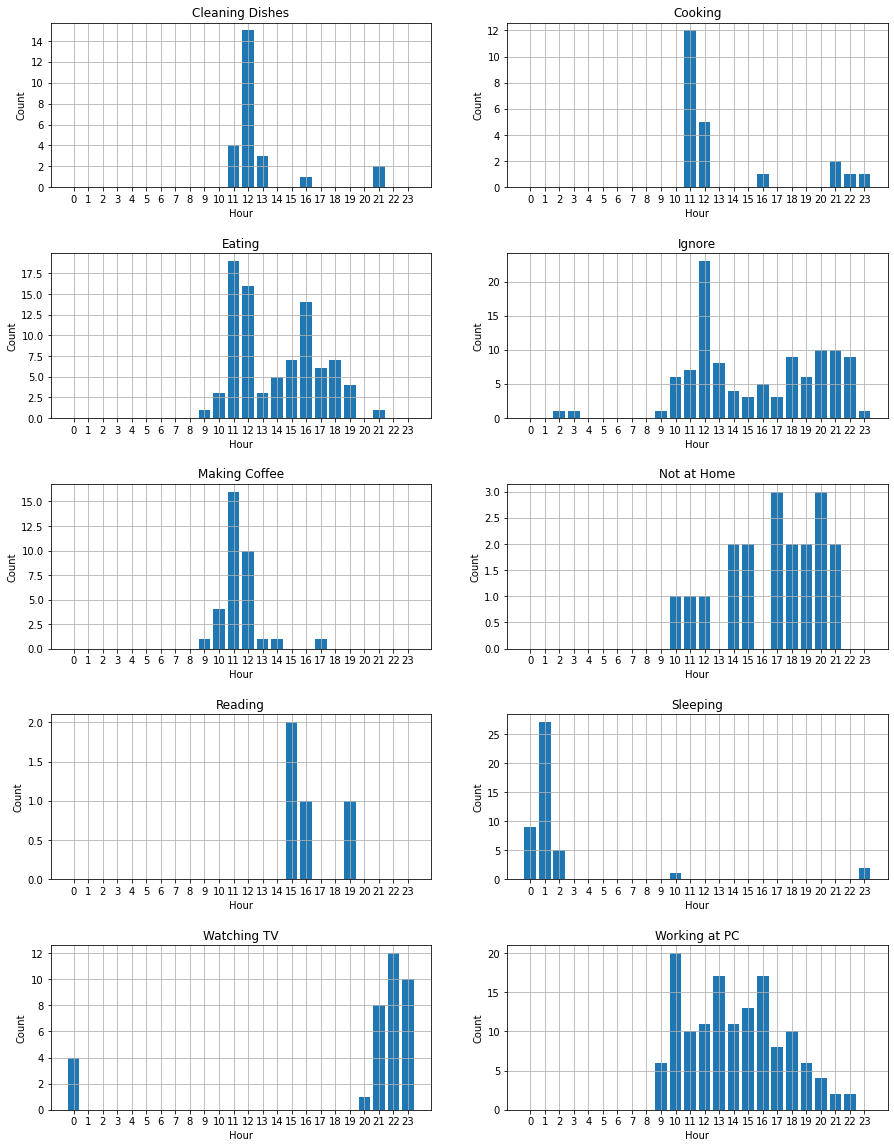

In [24]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()
plt.subplots_adjust(hspace=0.4)
for i, col in enumerate(statistics.columns[1:]):
    axs[i].bar(statistics.Hour, statistics[col])
    axs[i].set_xticks(np.arange(24))
    axs[i].set_ylabel("Count")
    axs[i].set_xlabel("Hour")
    axs[i].set_title(col)
    axs[i].grid(True)

In [25]:
for i, val in enumerate(df_act.duplicated(subset='TimeID')):
    if val == True:
        print(i)

27
70
254
329


In [26]:
df_act.iloc[26:28,:]

,TimeStamp,SensorID,Value,EnumerationID,ValueID,Name,Date,Hour,Minute,TimeID
26,2013-03-06 19:39:21,100,6,1,6,Not at Home,2013-03-06,19,39,2013-03-06-19-39
27,2013-03-06 19:39:25,100,6,1,6,Not at Home,2013-03-06,19,39,2013-03-06-19-39


In [27]:
df_act.iloc[69:71,:]

,TimeStamp,SensorID,Value,EnumerationID,ValueID,Name,Date,Hour,Minute,TimeID
69,2013-03-13 10:21:02,100,2,1,2,Sleeping,2013-03-13,10,21,2013-03-13-10-21
70,2013-03-13 10:21:11,100,4,1,4,Working at PC,2013-03-13,10,21,2013-03-13-10-21


In [28]:
df_act.iloc[253:255,:]

,TimeStamp,SensorID,Value,EnumerationID,ValueID,Name,Date,Hour,Minute,TimeID
253,2013-04-03 20:57:14,100,6,1,6,Not at Home,2013-04-03,20,57,2013-04-03-20-57
254,2013-04-03 20:57:17,100,6,1,6,Not at Home,2013-04-03,20,57,2013-04-03-20-57


In [29]:
df_act.iloc[328:330,:]

,TimeStamp,SensorID,Value,EnumerationID,ValueID,Name,Date,Hour,Minute,TimeID
328,2013-04-12 12:30:41,100,7,1,7,Ignore,2013-04-12,12,30,2013-04-12-12-30
329,2013-04-12 12:30:43,100,7,1,7,Ignore,2013-04-12,12,30,2013-04-12-12-30


In [30]:
max_ = 0
id_ = 0
arr = []
df_sensor = []
for i in sensors["SensorID"]:
    name = sensors.loc[sensors["SensorID"]==i, "Name"].item()
    location = sensors.loc[sensors["SensorID"]==i, "Location"].item()
    tmp = sensor_history[sensor_history["SensorID"]==i]
    arr.append(i)
    if len(tmp) > max_:
        max_ = len(tmp)
        id_ = i
    data = {
        "Id": i, 
        "Sensor": name, 
        "Location": location,
        "Length": len(tmp)
    }
    df_sensor.append(data)
    
df_sensor = pd.DataFrame(df_sensor)
df_sensor

,Id,Sensor,Location,Length
0,1,Temperature,Utility Room,755990
1,2,Brightness (Daylight),Utility Room,755984
2,3,Motion,Utility Room,31
3,4,Temperature,Kitchen,829213
4,5,Brightness,Kitchen,829200
5,6,Motion,Kitchen,69076
6,7,Temperature,Work Area,710260
7,8,Brigthness,Work Area,710254
8,9,Motion,Work Area,18808
9,10,Temperature,Living Room,742753
